In [19]:
library(brms)
library(readxl)
library(effects)
library(sjPlot)

In [20]:
df <- read_excel("../figures/statistics.xlsx")
df

t1,t2,l1,l2,hits,genre1,genre2,subgenre1,subgenre2,author1,author2
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Alexanders geesten,Alexiuslegende,14217,53,1,Epiek,Epiek,Ridder,Heiligenleven,Jacob van Maerlant,NA
Alexanders geesten,Anatomie van de mens,14217,180,13,Epiek,Epiek,Ridder,Didactiek,Jacob van Maerlant,NA
Alexanders geesten,Arturs doet,14217,12282,1024,Epiek,Epiek,Ridder,Arthur,Jacob van Maerlant,NA
Alexanders geesten,Aubri de Borgengoen,14217,345,100,Epiek,Epiek,Ridder,Karel,Jacob van Maerlant,NA
Alexiuslegende,Alexanders geesten,53,14217,1,Epiek,Epiek,Heiligenleven,Ridder,NA,Jacob van Maerlant
Alexiuslegende,Anatomie van de mens,53,180,0,Epiek,Epiek,Heiligenleven,Didactiek,NA,NA
Alexiuslegende,Arturs doet,53,12282,1,Epiek,Epiek,Heiligenleven,Arthur,NA,NA
Alexiuslegende,Aubri de Borgengoen,53,345,0,Epiek,Epiek,Heiligenleven,Karel,NA,NA
Anatomie van de mens,Alexanders geesten,180,14217,11,Epiek,Epiek,Didactiek,Ridder,NA,Jacob van Maerlant


In [3]:
df <- df[!is.na(df['author1']), ]
df <- df[!is.na(df['author2']), ]
df

t1,t2,l1,l2,hits,genre1,genre2,subgenre1,subgenre2,date1,date2,author1,author2
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
Alexanders geesten,Boec vander wraken,14217,5651,680,Epiek,Epiek,Ridder,Didactiek,1400,1400,Jacob van Maerlant,Jan van Boendale
Alexanders geesten,Brabantsche yeesten (B1-5),14217,6584,886,Epiek,Epiek,Ridder,Historiografie,1400,1470,Jacob van Maerlant,Jan van Boendale
Alexanders geesten,Der leken spieghel,14217,22005,1489,Epiek,Epiek,Ridder,Didactiek,1400,1350,Jacob van Maerlant,Jan van Boendale
Alexanders geesten,Der minnen loep,14217,11139,624,Epiek,Epiek,Ridder,Didactiek,1400,1480,Jacob van Maerlant,Dirc Potter
Alexanders geesten,Esopet,14217,1562,84,Epiek,Epiek,Ridder,Dier,1400,1350,Jacob van Maerlant,Calfstaf en Noydekin
Alexanders geesten,Floris ende Blancefloer,14217,4006,404,Epiek,Epiek,Ridder,Ridder,1400,1350,Jacob van Maerlant,Diederic van Assenede
Boec vander wraken,Alexanders geesten,5651,14217,455,Epiek,Epiek,Didactiek,Ridder,1400,1400,Jan van Boendale,Jacob van Maerlant
Boec vander wraken,Brabantsche yeesten (B1-5),5651,6584,467,Epiek,Epiek,Didactiek,Historiografie,1400,1470,Jan van Boendale,Jan van Boendale
Boec vander wraken,Der leken spieghel,5651,22005,1089,Epiek,Epiek,Didactiek,Didactiek,1400,1350,Jan van Boendale,Jan van Boendale


In [4]:
compareNA <- function(v1,v2) {
    same <- (v1 == v2) | (is.na(v1) & is.na(v2))
    same[is.na(same)] <- FALSE
    return(same)
}

In [5]:
df['author'] <- compareNA(df['author1'], df['author2'])
df['genre'] <- compareNA(df['subgenre1'], df['subgenre2'])
df

t1,t2,l1,l2,hits,genre1,genre2,subgenre1,subgenre2,date1,date2,author1,author2,author,genre
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,<lgl>
Alexanders geesten,Boec vander wraken,14217,5651,680,Epiek,Epiek,Ridder,Didactiek,1400,1400,Jacob van Maerlant,Jan van Boendale,FALSE,FALSE
Alexanders geesten,Brabantsche yeesten (B1-5),14217,6584,886,Epiek,Epiek,Ridder,Historiografie,1400,1470,Jacob van Maerlant,Jan van Boendale,FALSE,FALSE
Alexanders geesten,Der leken spieghel,14217,22005,1489,Epiek,Epiek,Ridder,Didactiek,1400,1350,Jacob van Maerlant,Jan van Boendale,FALSE,FALSE
Alexanders geesten,Der minnen loep,14217,11139,624,Epiek,Epiek,Ridder,Didactiek,1400,1480,Jacob van Maerlant,Dirc Potter,FALSE,FALSE
Alexanders geesten,Esopet,14217,1562,84,Epiek,Epiek,Ridder,Dier,1400,1350,Jacob van Maerlant,Calfstaf en Noydekin,FALSE,FALSE
Alexanders geesten,Floris ende Blancefloer,14217,4006,404,Epiek,Epiek,Ridder,Ridder,1400,1350,Jacob van Maerlant,Diederic van Assenede,FALSE,TRUE
Boec vander wraken,Alexanders geesten,5651,14217,455,Epiek,Epiek,Didactiek,Ridder,1400,1400,Jan van Boendale,Jacob van Maerlant,FALSE,FALSE
Boec vander wraken,Brabantsche yeesten (B1-5),5651,6584,467,Epiek,Epiek,Didactiek,Historiografie,1400,1470,Jan van Boendale,Jan van Boendale,TRUE,FALSE
Boec vander wraken,Der leken spieghel,5651,22005,1089,Epiek,Epiek,Didactiek,Didactiek,1400,1350,Jan van Boendale,Jan van Boendale,TRUE,TRUE


In [6]:
df['N'] <- df['l1'] * df['l2']
df

t1,t2,l1,l2,hits,genre1,genre2,subgenre1,subgenre2,date1,date2,author1,author2,author,genre,N
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,<lgl>,<dbl>
Alexanders geesten,Boec vander wraken,14217,5651,680,Epiek,Epiek,Ridder,Didactiek,1400,1400,Jacob van Maerlant,Jan van Boendale,FALSE,FALSE,80340267
Alexanders geesten,Brabantsche yeesten (B1-5),14217,6584,886,Epiek,Epiek,Ridder,Historiografie,1400,1470,Jacob van Maerlant,Jan van Boendale,FALSE,FALSE,93604728
Alexanders geesten,Der leken spieghel,14217,22005,1489,Epiek,Epiek,Ridder,Didactiek,1400,1350,Jacob van Maerlant,Jan van Boendale,FALSE,FALSE,312845085
Alexanders geesten,Der minnen loep,14217,11139,624,Epiek,Epiek,Ridder,Didactiek,1400,1480,Jacob van Maerlant,Dirc Potter,FALSE,FALSE,158363163
Alexanders geesten,Esopet,14217,1562,84,Epiek,Epiek,Ridder,Dier,1400,1350,Jacob van Maerlant,Calfstaf en Noydekin,FALSE,FALSE,22206954
Alexanders geesten,Floris ende Blancefloer,14217,4006,404,Epiek,Epiek,Ridder,Ridder,1400,1350,Jacob van Maerlant,Diederic van Assenede,FALSE,TRUE,56953302
Boec vander wraken,Alexanders geesten,5651,14217,455,Epiek,Epiek,Didactiek,Ridder,1400,1400,Jan van Boendale,Jacob van Maerlant,FALSE,FALSE,80340267
Boec vander wraken,Brabantsche yeesten (B1-5),5651,6584,467,Epiek,Epiek,Didactiek,Historiografie,1400,1470,Jan van Boendale,Jan van Boendale,TRUE,FALSE,37206184
Boec vander wraken,Der leken spieghel,5651,22005,1089,Epiek,Epiek,Didactiek,Didactiek,1400,1350,Jan van Boendale,Jan van Boendale,TRUE,TRUE,124350255


In [7]:
covariate_fit <- brm(hits | trials(N) ~ 1 + author + genre,
           data = df, family = binomial(link="logit"))
covariate_fit <- add_criterion(covariate_fit, "loo")

Compiling Stan program...

Start sampling




SAMPLING FOR MODEL '1c1dca545f6275c2caf6498af6726610' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 5.4e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.54 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.056868 seconds (Warm-up)
Chain 1:                0.049435 seconds (Sampling)


Warning message:
“Found 11 observations with a pareto_k > 0.7 in model 'covariate_fit'. It is recommended to set 'moment_match = TRUE' in order to perform moment matching for problematic observations. ”


In [8]:
covariate_fit

 Family: binomial 
  Links: mu = logit 
Formula: hits | trials(N) ~ 1 + author + genre 
   Data: df (Number of observations: 42) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
           Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept    -12.33      0.01   -12.35   -12.31 1.00     2865     2786
authorTRUE     0.80      0.02     0.77     0.83 1.00     3207     2913
genreTRUE     -0.09      0.02    -0.12    -0.06 1.00     2823     2823

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

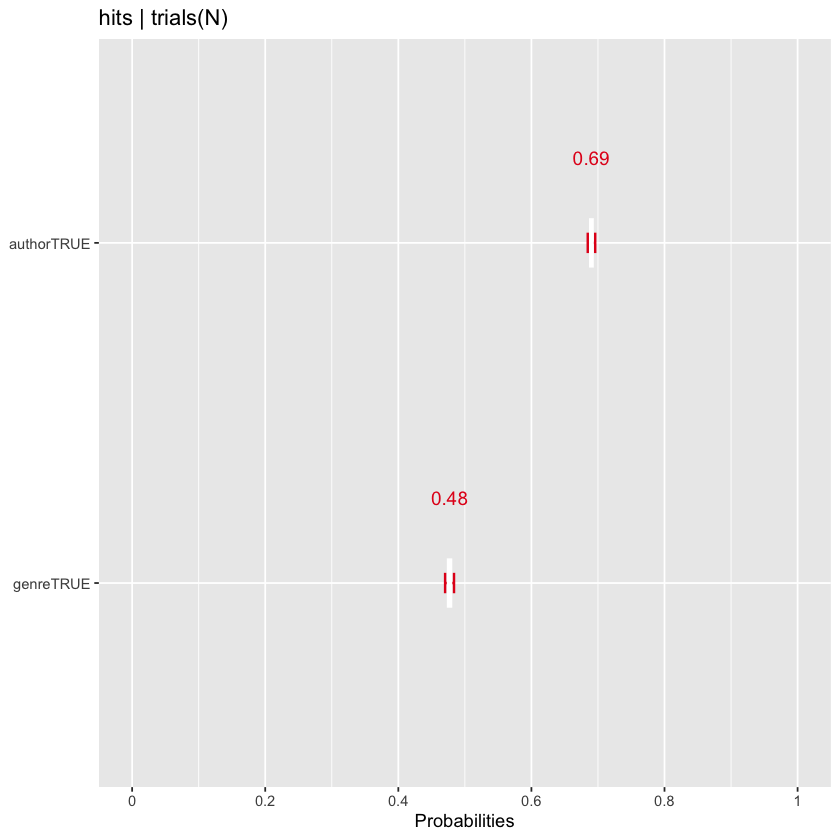

In [9]:
plot_model(covariate_fit, type="est", show.values=T, sort.est=TRUE, transform="plogis")

In [10]:
intercept_fit <- brm(hits | trials(N) ~ 1,
           data = df, family = binomial(link="logit"))
intercept_fit <- add_criterion(intercept_fit, "loo")

Compiling Stan program...

Start sampling




SAMPLING FOR MODEL '9bc850d1398c44f2aff1bd5d0ef682a2' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 2.7e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.27 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.030151 seconds (Warm-up)
Chain 1:                0.034886 seconds (Sampling)


Warning message:
“Found 12 observations with a pareto_k > 0.7 in model 'intercept_fit'. It is recommended to set 'moment_match = TRUE' in order to perform moment matching for problematic observations. ”


In [11]:
loo <- loo_compare(covariate_fit, intercept_fit, criterion = "loo")
loo

,elpd_diff,se_diff,elpd_loo,se_elpd_loo,p_loo,se_p_loo,looic,se_looic
covariate_fit,0.000,0.0000,-1472.430,290.9407,198.0426,56.53475,2944.859,581.8813
intercept_fit,-1071.146,493.1113,-2543.575,578.7170,137.3002,40.79544,5087.150,1157.4340


In [12]:
waic_wts <- model_weights(covariate_fit, intercept_fit, weights = "waic")
waic_wts

covariate_fit intercept_fit 
            1             0

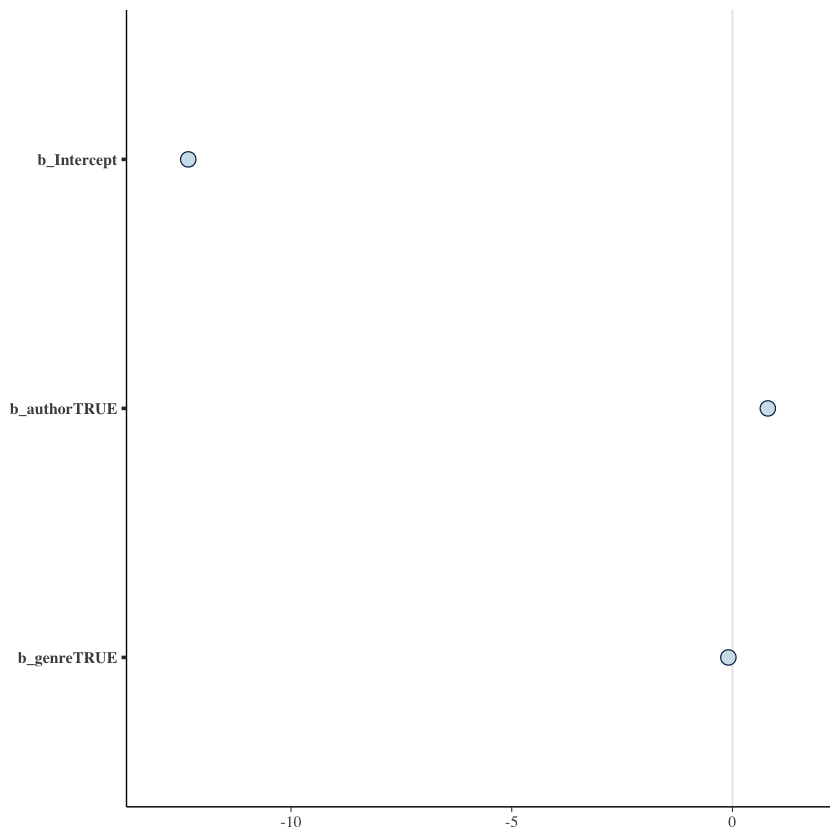

In [18]:
mcmc_plot(covariate_fit, prob = 0.90)